## Mid Term Examination                 
## Natural Language Processing 
#### Name : Syed Afaq Shah              
#### Subject: Advanced Natural Language Processing
#### Semester 1 Imsciences

In [1]:
import numpy as np 
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction import text
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataTrain = pd.read_csv("imdb_urdu_reviews_train.csv", encoding='utf-8')
dataTest = pd.read_csv("imdb_urdu_reviews_test.csv", encoding='utf-8')


In [3]:
data = pd.concat([dataTrain, dataTest], ignore_index=True)
data.head()

,review,sentiment
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...,positive
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...,negative
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...,positive
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...,negative
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...,positive


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
distribution = data['sentiment'].value_counts()
print(distribution)

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [7]:
import urduhack
#Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings

def removing_unwanted_data(text):
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'&amp;', '', text)  # Remove &amp;
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)  # Remove special characters
    text = re.sub(r'([_\-;"()%|+&=*%.,!?$@[\]/])\1+', ' ', text) #for removal of consective special 
    text = re.sub(r'<br />', ' ', text)  # Remove <br /> tags
    text = re.sub(r'\'', ' ', text)  # Remove single quotes
    text = re.sub(r'[a-zA-Z]', ' ', text)
    text = re.sub(r'\d+', ' ', text)  # Remove numbers
    text = re.sub(r'[a-zA-Z]+', ' ', text) #Remove englsh 
    text = re.sub(r'[\u200b\u200c\u200d\u200e\u200f\u202a\u202b\u202c\u202d\u2060\u2061\u2062\u2063\uf04a\\uf04a]+', '', text)
    # remove stop words
    
#         text = text.split()
#         stops = set(stopwords.words("english"))
#         text = [w for w in text if not w in stops]
#         text = " ".join(text)

    # Tokenize each word
    text =  nltk.WordPunctTokenizer().tokenize(text)
        
    return text



In [8]:

data['text_cleaned']= list(map(removing_unwanted_data,data.review))


In [9]:
data.head()

,review,sentiment,text_cleaned
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...,positive,"[میں, نے, اسے, کی, دہائی, کے, وسط, میں, ایک, ک..."
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...,negative,"[چونکہ, میں, نے, کی, دہائی, میں, انسپکٹر, گیجٹ..."
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...,positive,"[ایک, ایسے, معاشرے, کی, حالت, کے, بارے, میں, ت..."
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...,negative,"[مفید, البرٹ, پیون, کی, طرف, سے, ایک, اور, ردی..."
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...,positive,"[یہ, کولمبو, ہے, جس, کی, ہدایتکاری, اپنے, کیری..."


In [10]:
import json

from urduhack.config import LEMMA_LOOKUP_TABLE_PATH

_WORD2LEMMA = None


def lemma_lookup(text, lookup_path: str = LEMMA_LOOKUP_TABLE_PATH) -> list:
    tokens = text
    global _WORD2LEMMA
    if _WORD2LEMMA is None:
        with open(lookup_path, "r", encoding="utf-8") as file:
            _WORD2LEMMA = json.load(file)

    return [_WORD2LEMMA[word] if word in _WORD2LEMMA else word for word in tokens]

data['Lemmatized'] =list(map(lemma_lookup,data.text_cleaned))

In [11]:
data.head()

,review,sentiment,text_cleaned,Lemmatized
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...,positive,"[میں, نے, اسے, کی, دہائی, کے, وسط, میں, ایک, ک...","[میں, نے, اسے, کم, دہائی, کم, وسط, میں, ایک, ک..."
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...,negative,"[چونکہ, میں, نے, کی, دہائی, میں, انسپکٹر, گیجٹ...","[چونکہ, میں, نے, کم, دہائی, میں, انسپکٹر, گیجٹ..."
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...,positive,"[ایک, ایسے, معاشرے, کی, حالت, کے, بارے, میں, ت...","[ایک, ایسا, معاشرہ, کم, حالت, کم, بارے, میں, ت..."
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...,negative,"[مفید, البرٹ, پیون, کی, طرف, سے, ایک, اور, ردی...","[مفید, البرٹ, پیون, کم, طرف, سے, ایک, اور, ردی..."
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...,positive,"[یہ, کولمبو, ہے, جس, کی, ہدایتکاری, اپنے, کیری...","[میں, کولمبو, ہونا, جو, کم, ہدایتکاری, اپنا, ک..."


In [12]:
stopwords_list=['آ', 'آئی', 'آئیں', 'آئے', 'آتا', 'آتی', 'آتے', 'آداب', 'آدھ', 'آدھا', 'آدھی', 'آدھے', 'آس', 'آمدید', 'آنا', 'آنسہ', 'آنی', 'آنے', 'آپ', 'آگے', 'آہ', 'آہا', 'آیا', 'اب', 'ابھی', 'ابے', 'اتوار', 'ارب', 'اربویں', 'ارے', 'اس', 'اسکا', 'اسکی', 'اسکے', 'اسی', 'اسے', 'اف', 'افوہ', 'البتہ', 'الف', 'ان', 'اندر', 'انکا', 'انکی', 'انکے', 'انہوں', 'انہی', 'انہیں', 'اوئے', 'اور', 'اوپر', 'اوہو', 'اپ', 'اپنا', 'اپنوں', 'اپنی', 'اپنے', 'اپنےآپ', 'اکثر', 'اگر', 'اگرچہ', 'اگست', 'اہاہا', 'ایسا', 'ایسی', 'ایسے', 'ایک', 'بائیں', 'بار', 'بارے', 'بالکل', 'باوجود', 'باہر', 'بج', 'بجے', 'بخیر', 'بشرطیکہ', 'بعد', 'بعض', 'بغیر', 'بلکہ', 'بن', 'بنا', 'بناؤ', 'بند', 'بڑی', 'بھر', 'بھریں', 'بھی', 'بہت', 'بہتر', 'بیگم', 'تاکہ', 'تاہم', 'تب', 'تجھ', 'تجھی', 'تجھے', 'ترا', 'تری', 'تلک', 'تم', 'تمام', 'تمہارا', 'تمہاروں', 'تمہاری', 'تمہارے', 'تمہیں', 'تو', 'تک', 'تھا', 'تھی', 'تھیں', 'تھے', 'تہائی', 'تیرا', 'تیری', 'تیرے', 'تین', 'جا', 'جاؤ', 'جائیں', 'جائے', 'جاتا', 'جاتی', 'جاتے', 'جانی', 'جانے', 'جب', 'جبکہ', 'جدھر', 'جس', 'جسے', 'جن', 'جناب', 'جنہوں', 'جنہیں', 'جو', 'جہاں', 'جی', 'جیسا', 'جیسوں', 'جیسی', 'جیسے', 'حالانکہ', 'حالاں', 'حصہ', 'حضرت', 'خاطر', 'خالی', 'خواہ', 'خوب', 'خود', 'دائیں', 'درمیان', 'دریں', 'دو', 'دوران', 'دوسرا', 'دوسروں', 'دوسری', 'دوں', 'دکھائیں', 'دگنا', 'دی', 'دیئے', 'دیا', 'دیتا', 'دیتی', 'دیتے', 'دیر', 'دینا', 'دینی', 'دینے', 'دیکھو', 'دیں', 'دیے', 'دے', 'ذریعے', 'رکھا', 'رکھتا', 'رکھتی', 'رکھتے', 'رکھنا', 'رکھنی', 'رکھنے', 'رکھو', 'رکھی', 'رکھے', 'رہ', 'رہا', 'رہتا', 'رہتی', 'رہتے', 'رہنا', 'رہنی', 'رہنے', 'رہو', 'رہی', 'رہیں', 'رہے', 'ساتھ', 'سامنے', 'ساڑھے', 'سب', 'سبھی', 'سراسر', 'سمیت', 'سوا', 'سوائے', 'سکا', 'سکتا', 'سکتے', 'سہ', 'سہی', 'سی', 'سے', 'شاید', 'شکریہ', 'صاحب', 'صاحبہ', 'صرف', 'ضرور', 'طرح', 'طرف', 'طور', 'علاوہ', 'عین', 'فقط', 'فلاں', 'فی', 'قبل', 'قطا', 'لئے', 'لائی', 'لائے', 'لاتا', 'لاتی', 'لاتے', 'لانا', 'لانی', 'لانے', 'لایا', 'لو', 'لوجی', 'لوگوں', 'لگ', 'لگا', 'لگتا', 'لگتی', 'لگی', 'لگیں', 'لگے', 'لہذا', 'لی', 'لیا', 'لیتا', 'لیتی', 'لیتے', 'لیکن', 'لیں', 'لیے', 'لے', 'ماسوا', 'مت', 'مجھ', 'مجھی', 'مجھے', 'محترم', 'محترمہ', 'محترمی', 'محض', 'مرا', 'مرحبا', 'مری', 'مرے', 'مزید', 'مس', 'مسز', 'مسٹر', 'مطابق', 'مل', 'منٹ', 'منٹوں', 'مکرمی', 'مگر', 'مگھر', 'مہربانی', 'میرا', 'میروں', 'میری', 'میرے', 'میں', 'نا', 'نزدیک', 'نما', 'نو', 'نہ', 'نہیں', 'نیز', 'نیچے', 'نے', 'و', 'وار', 'واسطے', 'واقعی', 'والا', 'والوں', 'والی', 'والے', 'واہ', 'وجہ', 'ورنہ', 'وعلیکم', 'وغیرہ', 'ولے', 'وگرنہ', 'وہ', 'وہاں', 'وہی', 'وہیں', 'ویسا', 'ویسے', 'ویں', 'پاس', 'پایا', 'پر', 'پس', 'پلیز', 'پون', 'پونا', 'پونی', 'پونے', 'پھر', 'پہ', 'پہر', 'پہلا', 'پہلی', 'پہلے', 'پیر', 'پیچھے', 'چاہئے', 'چاہتے', 'چاہیئے', 'چاہے', 'چلا', 'چلو', 'چلیں', 'چلے', 'چناچہ', 'چند', 'چونکہ', 'چوگنی', 'چکی', 'چکیں', 'چکے', 'ڈالنا', 'ڈالنی', 'ڈالنے', 'ڈالے', 'کئے', 'کا', 'کاش', 'کب', 'کبھی', 'کدھر', 'کر', 'کرتا', 'کرتی', 'کرتے', 'کرم', 'کرنا', 'کرنے', 'کرو', 'کریں', 'کرے', 'کس', 'کسی', 'کسے', 'کل', 'کم', 'کن', 'کنہیں', 'کو', 'کوئی', 'کون', 'کونسا', 'کونسے', 'کچھ', 'کہ', 'کہا', 'کہاں', 'کہہ', 'کہی', 'کہیں', 'کہے', 'کی', 'کیا', 'کیسا', 'کیسے', 'کیونکر', 'کیونکہ', 'کیوں', 'کیے', 'کے', 'گئی', 'گئے', 'گا', 'گرما', 'گرمی', 'گنا', 'گو', 'گویا', 'گھنٹا', 'گھنٹوں', 'گھنٹے', 'گی', 'گیا', 'ہائیں', 'ہائے', 'ہاں', 'ہر', 'ہرچند', 'ہرگز', 'ہزار', 'ہم', 'ہمارا', 'ہماری', 'ہمارے', 'ہمی', 'ہمیں', 'ہو', 'ہوئی', 'ہوئیں', 'ہوئے', 'ہوا', 'ہوبہو', 'ہوتا', 'ہوتی', 'ہوتیں', 'ہوتے', 'ہونا', 'ہونگے', 'ہونی', 'ہونے', 'ہوں', 'ہی', 'ہیلو', 'ہیں', 'ہے', 'یا', 'یات', 'یعنی', 'یک', 'یہ', 'یہاں', 'یہی', 'یہیں']


In [ ]:
nltk.download('punkt')  # Download punkt tokenizer if not already done

# Your list of Urdu stopwords (already defined)


# Example DataFrame (assuming 'Lemmatized' column contains Urdu text)
text=data['Lemmatized']

# Function to remove stop words from the 'Lemmatized' column
def remove_urdu_stopwords(text, stopwords_list):
    # Tokenize the text
    
    # Remove stopwords by filtering out words that are in the stopwords list
    filtered_words = [word for word in text if word not in stopwords_list]
    return filtered_words

# Apply the function to the 'Lemmatized' column
data['Lemmatized_no_stopwords'] = data['Lemmatized'].apply(lambda x: remove_urdu_stopwords(x, stopwords_list))

# Show the resulting DataFrame with stop words removed


In [14]:
data['Lemmatized_no_stopwords'].head()

0    [دہائی, وسط, کیبل, گائیڈ, اسکائینجر, ہنٹ, اپیل...
1    [دہائی, انسپکٹر, گیجٹ, کارٹون, پسند, ،, فلم, د...
2    [معاشرہ, حالت, تعجب, والد, پیدا, البرٹ, ٹی, فٹ...
3    [مفید, البرٹ, پیون, ردی, ٹوکری, گریڈ, زیڈ, جلد...
4    [کولمبو, ہدایتکاری, کیریئر, ابتدائی, وقت, پرنا...
Name: Lemmatized_no_stopwords, dtype: object

## The word cloud doesnt work properly because of font problem.

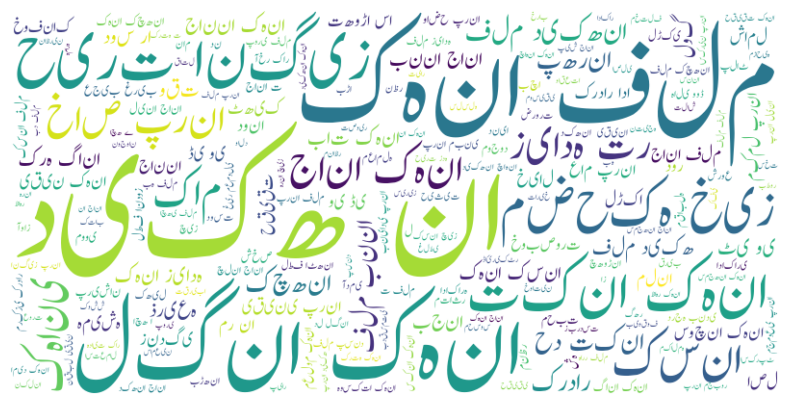

In [31]:
from wordcloud import WordCloud
urdu_font_path = 'Jameel Noori Nastaleeq Regular.ttf'


filtered_tokens = [word for sublist in data['Lemmatized_no_stopwords'] for word in sublist]


filtered_text = " ".join(filtered_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',font_path=urdu_font_path ).generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack


tokenized_data = data['Lemmatized_no_stopwords']

# Step 1: Convert tokenized data into space-separated strings for each review
tokenized_strings = [' '.join(tokens) for tokens in tokenized_data]


vectorizer_unigrams = CountVectorizer()  # For unigrams


X_unigrams = vectorizer_unigrams.fit_transform(tokenized_strings)

# Step 4: The final feature matrix containing only unigrams
print(X_unigrams.shape)  # To view the shape of the feature matrix
# print(X_unigrams.toarray())  

(50000, 92252)


In [15]:
tokenized_data = data['Lemmatized_no_stopwords']


tokenized_strings = [' '.join(tokens) for tokens in tokenized_data]


vectorizer_bigrams = CountVectorizer(ngram_range=(2, 2))  # For bigrams


X_bigrams = vectorizer_bigrams.fit_transform(tokenized_strings)


print(X_bigrams.shape) 


(50000, 2207622)


In [16]:
tokenized_data = data['Lemmatized_no_stopwords']


tokenized_strings = [' '.join(tokens) for tokens in tokenized_data]


vectorizer_trigrams = CountVectorizer(ngram_range=(3, 3))  # For trigrams


X_trigrams = vectorizer_trigrams.fit_transform(tokenized_strings)


print(X_trigrams.shape)  # Check the shape of the feature matrix


(50000, 5035699)


In [17]:
tokenized_data = data['Lemmatized_no_stopwords']


tokenized_strings = [' '.join(tokens) for tokens in tokenized_data]


vectorizer_unigrams_bigrams = CountVectorizer(ngram_range=(1, 2))  # For unigrams and bigrams


X_unigrams_bigrams = vectorizer_unigrams_bigrams.fit_transform(tokenized_strings)


print(X_unigrams_bigrams.shape)  

(50000, 2299874)


In [16]:
vectorizer_unigrams_bigrams_trigrams = CountVectorizer(ngram_range=(1, 3))  # For unigrams, bigrams, and trigrams

# Step 3: Fit and transform the tokenized data (converted to strings)
X_unigrams_bigrams_trigrams = vectorizer_unigrams_bigrams_trigrams.fit_transform(tokenized_strings)

# Step 4: The final feature matrix containing unigrams, bigrams, and trigrams
print(X_unigrams_bigrams_trigrams.shape)

(50000, 7453663)


In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer



vectorizer_unigrams_bigrams = CountVectorizer(ngram_range=(1, 2))  # For unigrams and bigrams
X_unigrams_bigrams = vectorizer_unigrams_bigrams.fit_transform(tokenized_strings)


transformer = TfidfTransformer()
X_unigrams_bigrams_tfidf = transformer.fit_transform(X_unigrams_bigrams)

# Step 4: The final TF-IDF feature matrix containing both unigrams and bigrams
print(X_unigrams_bigrams_tfidf.shape)  # Check the shape of the TF-IDF feature matrix



# Optional: View the feature names (the actual unigrams and bigrams used)
print(vectorizer_unigrams_bigrams.get_feature_names_out())


(50000, 2299874)
['çã' 'çã اگلنا' 'çõ' ... 'યی اے' 'રکا' 'રکا سننا']


In [15]:
BOW_convert = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
x = BOW_convert.fit_transform(data['Lemmatized_no_stopwords'])

words = BOW_convert.get_feature_names_out()
print("The total number of columns are =", len(words))


print("Shape of arrays =", x.shape)

The total number of columns are = 92524
Shape of arrays = (50000, 92524)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data['Lemmatized_no_stopwords'],  # The text data
    data['sentiment'],  # The target variable
    test_size=0.2,  # 80% train, 20% test
    random_state=42  # For reproducibility
)


BOW_convert = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)


X_train_vec = BOW_convert.fit_transform(X_train)


X_test_vec = BOW_convert.transform(X_test)
tfidf_transform = TfidfTransformer(norm=None)


X_train_tfidf = tfidf_transform.fit_transform(X_train_vec)


X_test_tfidf = tfidf_transform.transform(X_test_vec)


print("Shape of training TF-IDF matrix:", X_train_tfidf.shape)
print("Shape of test TF-IDF matrix:", X_test_tfidf.shape)

# Print the shapes of the matrices and labels
print(X_train_vec.shape)  # Shape of training feature matrix
print(y_train.shape)      # Shape of training labels
print(X_test_vec.shape)   # Shape of test feature matrix
print(y_test.shape)       # Shape of test labels

Shape of training TF-IDF matrix: (40000, 82408)
Shape of test TF-IDF matrix: (10000, 82408)
(40000, 82408)
(40000,)
(10000, 82408)
(10000,)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Limit the data to the first 1000 samples
data_limited = data.head(1000)

# Split the data into training and testing sets (using 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    data_limited['Lemmatized_no_stopwords'],  # The text data
    data_limited['sentiment'],  # The target variable
    test_size=0.2,  # 80% train, 20% test
    random_state=42  # For reproducibility
)


BOW_convert = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)


X_train_vec = BOW_convert.fit_transform(X_train)


X_test_vec = BOW_convert.transform(X_test)


tfidf_transform = TfidfTransformer(norm=None)


X_train_tfidf = tfidf_transform.fit_transform(X_train_vec)

X_test_tfidf = tfidf_transform.transform(X_test_vec)

# Print the shapes of the resulting matrices
print("Shape of training TF-IDF matrix:", X_train_tfidf.shape)
print("Shape of test TF-IDF matrix:", X_test_tfidf.shape)

# Print the shapes of the matrices and labels
print(X_train_vec.shape)  # Shape of training feature matrix
print(y_train.shape)      # Shape of training labels
print(X_test_vec.shape)   # Shape of test feature matrix
print(y_test.shape)       # Shape of test labels

Shape of training TF-IDF matrix: (800, 10804)
Shape of test TF-IDF matrix: (200, 10804)
(800, 10804)
(800,)
(200, 10804)
(200,)


In [22]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Models to evaluate
models = {
    'Naive Bayes': MultinomialNB(),
    'LinearSVC': LinearSVC(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'k-NN': KNeighborsClassifier()
}

# Results storage
results = {}

# Standardize the TF-IDF features (important for SVM)
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_tfidf)
X_test_scaled = scaler.transform(X_test_tfidf)

# Evaluate each model using Stratified K-Fold Cross-Validation
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    # Cross-validation prediction using Stratified K-Fold
    if model_name == 'LinearSVC':
        # For LinearSVC, use the scaled data
        y_pred = cross_val_predict(model, X_train_scaled, y_train, cv=kf)
    else:
        # For other models, we can use the raw TF-IDF features
        y_pred = cross_val_predict(model, X_train_tfidf, y_train, cv=kf)
    
    # Calculate the metrics for multi-class classification
    accuracy = accuracy_score(y_train, y_pred)
    
    # Using 'macro' to average the metrics across all classes
    precision = precision_score(y_train, y_pred, average='macro')  
    recall = recall_score(y_train, y_pred, average='macro')  
    f1 = f1_score(y_train, y_pred, average='macro')  
    
    # Store the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Print the metrics for each model
    print(f"{model_name} - Accuracy: {accuracy:.4f}")
    print(f"{model_name} - Precision: {precision:.4f}")
    print(f"{model_name} - Recall: {recall:.4f}")
    print(f"{model_name} - F1 Score: {f1:.4f}")

# Print summary of all models' results
print("\nSummary of Cross-Validation Results:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")


Evaluating Naive Bayes...
Naive Bayes - Accuracy: 0.7013
Naive Bayes - Precision: 0.7016
Naive Bayes - Recall: 0.7005
Naive Bayes - F1 Score: 0.7005
Evaluating LinearSVC...
LinearSVC - Accuracy: 0.7325
LinearSVC - Precision: 0.7326
LinearSVC - Recall: 0.7320
LinearSVC - F1 Score: 0.7321
Evaluating Decision Tree...
Decision Tree - Accuracy: 0.6188
Decision Tree - Precision: 0.6189
Decision Tree - Recall: 0.6189
Decision Tree - F1 Score: 0.6187
Evaluating Random Forest...
Random Forest - Accuracy: 0.7662
Random Forest - Precision: 0.7693
Random Forest - Recall: 0.7649
Random Forest - F1 Score: 0.7649
Evaluating k-NN...
k-NN - Accuracy: 0.5337
k-NN - Precision: 0.5543
k-NN - Recall: 0.5396
k-NN - F1 Score: 0.5030

Summary of Cross-Validation Results:

Naive Bayes:
Accuracy: 0.7013
Precision: 0.7016
Recall: 0.7005
F1 Score: 0.7005

LinearSVC:
Accuracy: 0.7325
Precision: 0.7326
Recall: 0.7320
F1 Score: 0.7321

Decision Tree:
Accuracy: 0.6188
Precision: 0.6189
Recall: 0.6189
F1 Score: 0.6187

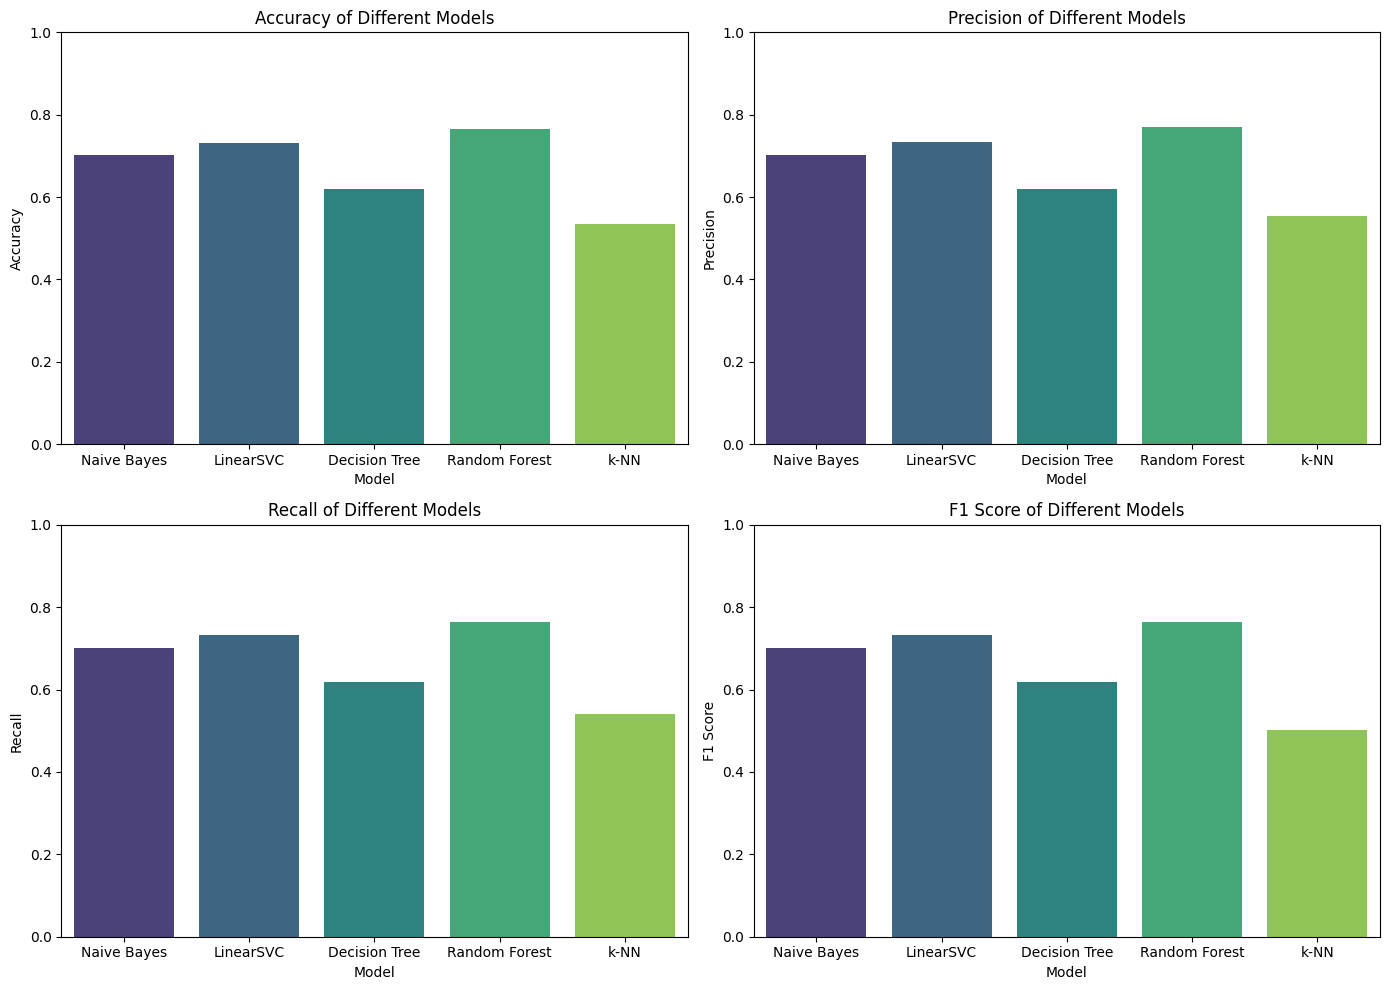

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


results = {
    'Naive Bayes': {'Accuracy': 0.7013, 'Precision': 0.7016, 'Recall': 0.7005, 'F1 Score': 0.7005},
    'LinearSVC': {'Accuracy': 0.7325, 'Precision': 0.7326, 'Recall': 0.7320, 'F1 Score': 0.7321},
    'Decision Tree': {'Accuracy': 0.6188, 'Precision': 0.6189, 'Recall': 0.6189, 'F1 Score': 0.6187},
    'Random Forest': {'Accuracy': 0.7662, 'Precision': 0.7693, 'Recall': 0.7649, 'F1 Score': 0.7649},
    'k-NN': {'Accuracy': 0.5337, 'Precision': 0.5543, 'Recall': 0.5396, 'F1 Score': 0.5030}
}




df_results = pd.DataFrame(results).T


plt.figure(figsize=(14, 10))

# Plot Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x=df_results.index, y=df_results['Accuracy'], palette='viridis')
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 

# Plot Precision
plt.subplot(2, 2, 2)
sns.barplot(x=df_results.index, y=df_results['Precision'], palette='viridis')
plt.title('Precision of Different Models')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.ylim(0, 1) 

# Plot Recall
plt.subplot(2, 2, 3)
sns.barplot(x=df_results.index, y=df_results['Recall'], palette='viridis')
plt.title('Recall of Different Models')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.ylim(0, 1) 

# Plot F1 Score
plt.subplot(2, 2, 4)
sns.barplot(x=df_results.index, y=df_results['F1 Score'], palette='viridis')
plt.title('F1 Score of Different Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1)  


plt.tight_layout()

# Show vis
plt.show()

#### (a)Based on accuracy and other metrics (Precision, Recall, and F1 Score), Random Forest appears to be the best-performing algorithm for this project
#### Random Forest is an ensemble method that combines multiple decision trees to improve generalization and reduce overfitting, making it more robust than individual decision trees. It captures complex feature interactions, which is beneficial for text data like movie reviews. Its robustness to noise in the data helps handle unstructured or imperfect text more effectively. By using bootstrapping and random feature selection, Random Forest reduces overfitting and provides more stable and accurate predictions. Overall, these advantages make it a strong performer for text classification tasks.


#### (b) SVM algo used to get stucked upon searching it said some kernel problem so i reduced the data to 1000


#### (c) During this project we encountered some non english language which can be seen in tf idf below the n grams maybe removing that would make our models better

####  I chose the Voting Classifier for this task because it combines the strengths of different models—Naïve Bayes, SVM, and Random Forest—to improve classification performance

In [24]:
from sklearn.ensemble import  VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('naive_bayes', MultinomialNB()),
        ('svm', LinearSVC(random_state=42, max_iter=1000)),
        ('random_forest', RandomForestClassifier()),
        ('knn', KNeighborsClassifier())
    ],
    voting='hard'  # Hard voting: majority class prediction
)

# Evaluate Voting Classifier using Stratified K-Fold Cross-Validation
print("\nEvaluating Voting Classifier...")
y_pred_voting = cross_val_predict(voting_clf, X_train_tfidf, y_train, cv=kf)

# Calculate the metrics for Voting Classifier
accuracy_voting = accuracy_score(y_train, y_pred_voting)
precision_voting = precision_score(y_train, y_pred_voting, average='macro')
recall_voting = recall_score(y_train, y_pred_voting, average='macro')
f1_voting = f1_score(y_train, y_pred_voting, average='macro')

# Store the results for Voting Classifier
results['Voting Classifier'] = {
    'Accuracy': accuracy_voting,
    'Precision': precision_voting,
    'Recall': recall_voting,
    'F1 Score': f1_voting
}

# Print the metrics for Voting Classifier
print(f"Voting Classifier - Accuracy: {accuracy_voting:.4f}")
print(f"Voting Classifier - Precision: {precision_voting:.4f}")
print(f"Voting Classifier - Recall: {recall_voting:.4f}")
print(f"Voting Classifier - F1 Score: {f1_voting:.4f}")

# Print summary of all models' results
print("\nSummary of Cross-Validation Results:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")


Evaluating Voting Classifier...
Voting Classifier - Accuracy: 0.7588
Voting Classifier - Precision: 0.7609
Voting Classifier - Recall: 0.7576
Voting Classifier - F1 Score: 0.7576

Summary of Cross-Validation Results:

Naive Bayes:
Accuracy: 0.7013
Precision: 0.7016
Recall: 0.7005
F1 Score: 0.7005

LinearSVC:
Accuracy: 0.7325
Precision: 0.7326
Recall: 0.7320
F1 Score: 0.7321

Decision Tree:
Accuracy: 0.6188
Precision: 0.6189
Recall: 0.6189
F1 Score: 0.6187

Random Forest:
Accuracy: 0.7662
Precision: 0.7693
Recall: 0.7649
F1 Score: 0.7649

k-NN:
Accuracy: 0.5337
Precision: 0.5543
Recall: 0.5396
F1 Score: 0.5030

Voting Classifier:
Accuracy: 0.7588
Precision: 0.7609
Recall: 0.7576
F1 Score: 0.7576


####  The Voting Classifier did better than some models (Naïve Bayes, SVM, Decision Tree, and k-NN) because it combined their strengths. However, Random Forest still performed the best because it is naturally strong at handling complex patterns and is more robust. While the Voting Classifier helped improve generalization, Random Forest was still a little better. The downside of using the Voting Classifier is that it takes more time and resources to compute, and it can be harder to understand how it makes its predictions.